<a href="https://colab.research.google.com/github/lmarieta/Alzheimer_MRI/blob/main/Alzheimer_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_798.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2592.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_318.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_207.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2248.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2733.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2791.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2393.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_106.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2986.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_707.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_756.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1199.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1758.jpg
/kaggle/input/alzheimer-mr

In [ ]:
def read_and_process_images(folder_path, label):
    data = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (128, 128))  # Resize to a common size
        img = img / 255.0  # Normalize pixel values to the range [0, 1]
        data.append(img)
        labels.append(label)
    return data, labels

In [ ]:
data = []
labels = []

data1, labels1 = read_and_process_images('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented', 'NonDemented')
data2, labels2 = read_and_process_images('/kaggle/input/alzheimer-mri-dataset/Dataset/Very_Mild_Demented', 'VeryMildDemented')
data3, labels3 = read_and_process_images('/kaggle/input/alzheimer-mri-dataset/Dataset/Mild_Demented', 'MildDemented')
data4, labels4 = read_and_process_images('/kaggle/input/alzheimer-mri-dataset/Dataset/Moderate_Demented', 'ModerateDemented')

data = np.concatenate([data1, data2, data3, data4], axis=0)
labels = np.concatenate([labels1, labels2, labels3, labels4], axis=0)

In [ ]:
img_size = 128

In [ ]:
print(data.shape)
print(labels.shape)
print(labels[0])

(6400, 128, 128, 3)
(6400,)
NonDemented


In [ ]:
def plot_images(images, labels, class_names, num_images=5):
    fig, axes = plt.subplots(len(class_names), num_images, figsize=(12, 8))

    for i, class_name in enumerate(class_names):
        class_images = images[labels == class_name][:num_images]

        for j in range(num_images):

            axes[i, j].imshow(class_images[j])
            axes[i, j].axis('off')

            if j == 0:
                axes[i, j].set_title(class_name)

    plt.show()

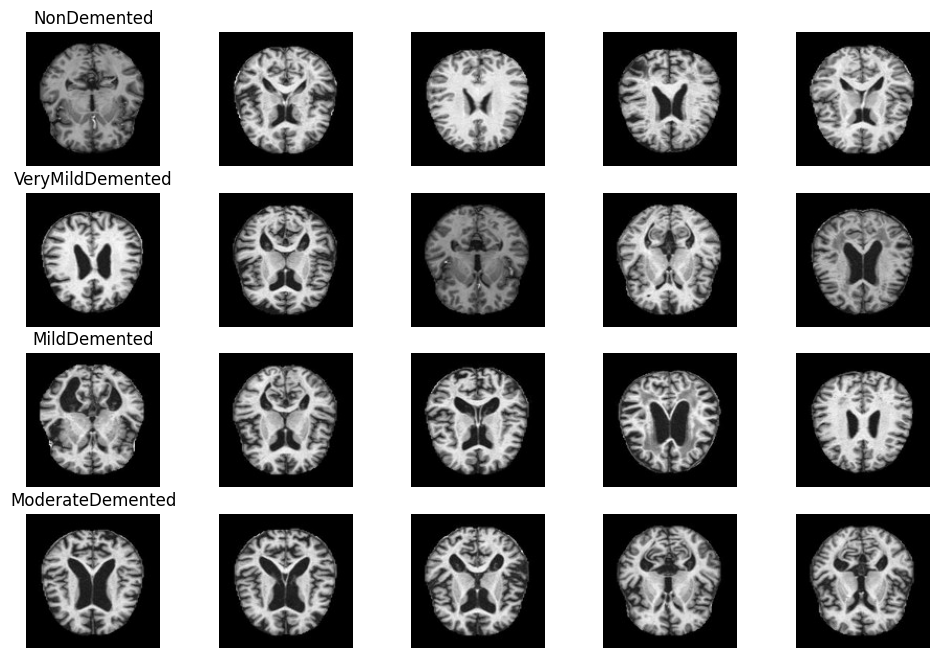

In [ ]:
class_names = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']

# Use the plot_images function to visualize a few images from each class
plot_images(data, labels, class_names)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(5120,)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming you have 'class_names' as a list of your class names
class_names = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

# Load pre-trained VGG16 model with weights trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming you have 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 16813124 (64.14 MB)
Trainable params: 2098436 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)
# Set up callbacks (optional but recommended)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, verbose=1, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model (you can adjust the learning rate and other parameters)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stopping])

# Evaluate the model on the test set (assuming you have a separate test set)
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Epoch 1/20
103/103 [==============================] - ETA: 0s - loss: 1.2449 - accuracy: 0.4747
Epoch 1: val_loss improved from inf to 0.95931, saving model to best_model.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


103/103 [==============================] - 374s 4s/step - loss: 1.2449 - accuracy: 0.4747 - val_loss: 0.9593 - val_accuracy: 0.5280
Epoch 2/20
103/103 [==============================] - ETA: 0s - loss: 0.9850 - accuracy: 0.5293
Epoch 2: val_loss improved from 0.95931 to 0.93490, saving model to best_model.h5
103/103 [==============================] - 373s 4s/step - loss: 0.9850 - accuracy: 0.5293 - val_loss: 0.9349 - val_accuracy: 0.5268
Epoch 3/20
103/103 [==============================] - ETA: 0s - loss: 0.9781 - accuracy: 0.5263
Epoch 3: val_loss improved from 0.93490 to 0.92285, saving model to best_model.h5
103/103 [==============================] - 379s 4s/step - loss: 0.9781 - accuracy: 0.5263 - val_loss: 0.9228 - val_accuracy: 0.5439
Epoch 4/20
103/103 [==============================] - ETA: 0s - loss: 0.9400 - accuracy: 0.5458
Epoch 4: val_loss improved from 0.92285 to 0.90511, saving model to best_model.h5
103/103 [==============================] - 380s 4s/step - loss: 0.9400